In [52]:
#Load libraries
import os
import pandas as pd
import numpy as np   
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_curve,auc
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns

In [53]:
#Set working directory
os.chdir(r"C:\Users\GLADY\Downloads\Santander Project Python")

In [54]:
#Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [15]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [55]:
###checking for null vLUES###
pd.set_option('display.max_rows',None)
train.isnull().sum()
#test.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0

In [ ]:
#Train contains:

#ID_code (string);
#target;
#200 numerical variables, named from var_0 to var_199;
#Test contains:

#ID_code (string);
#200 numerical variables, named from var_0 to var_199;

In [9]:
##Explore the data##
train.shape
#train.dtypes
#test.shape
#test.dtypes

(200000, 202)

In [8]:
train.target.nunique()
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

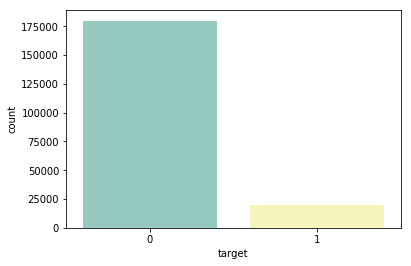

In [22]:
sns.countplot(train['target'], palette='Set3')
#train.hist(column='target')
# implies that the dataset is very unbalanced.

In [16]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [17]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


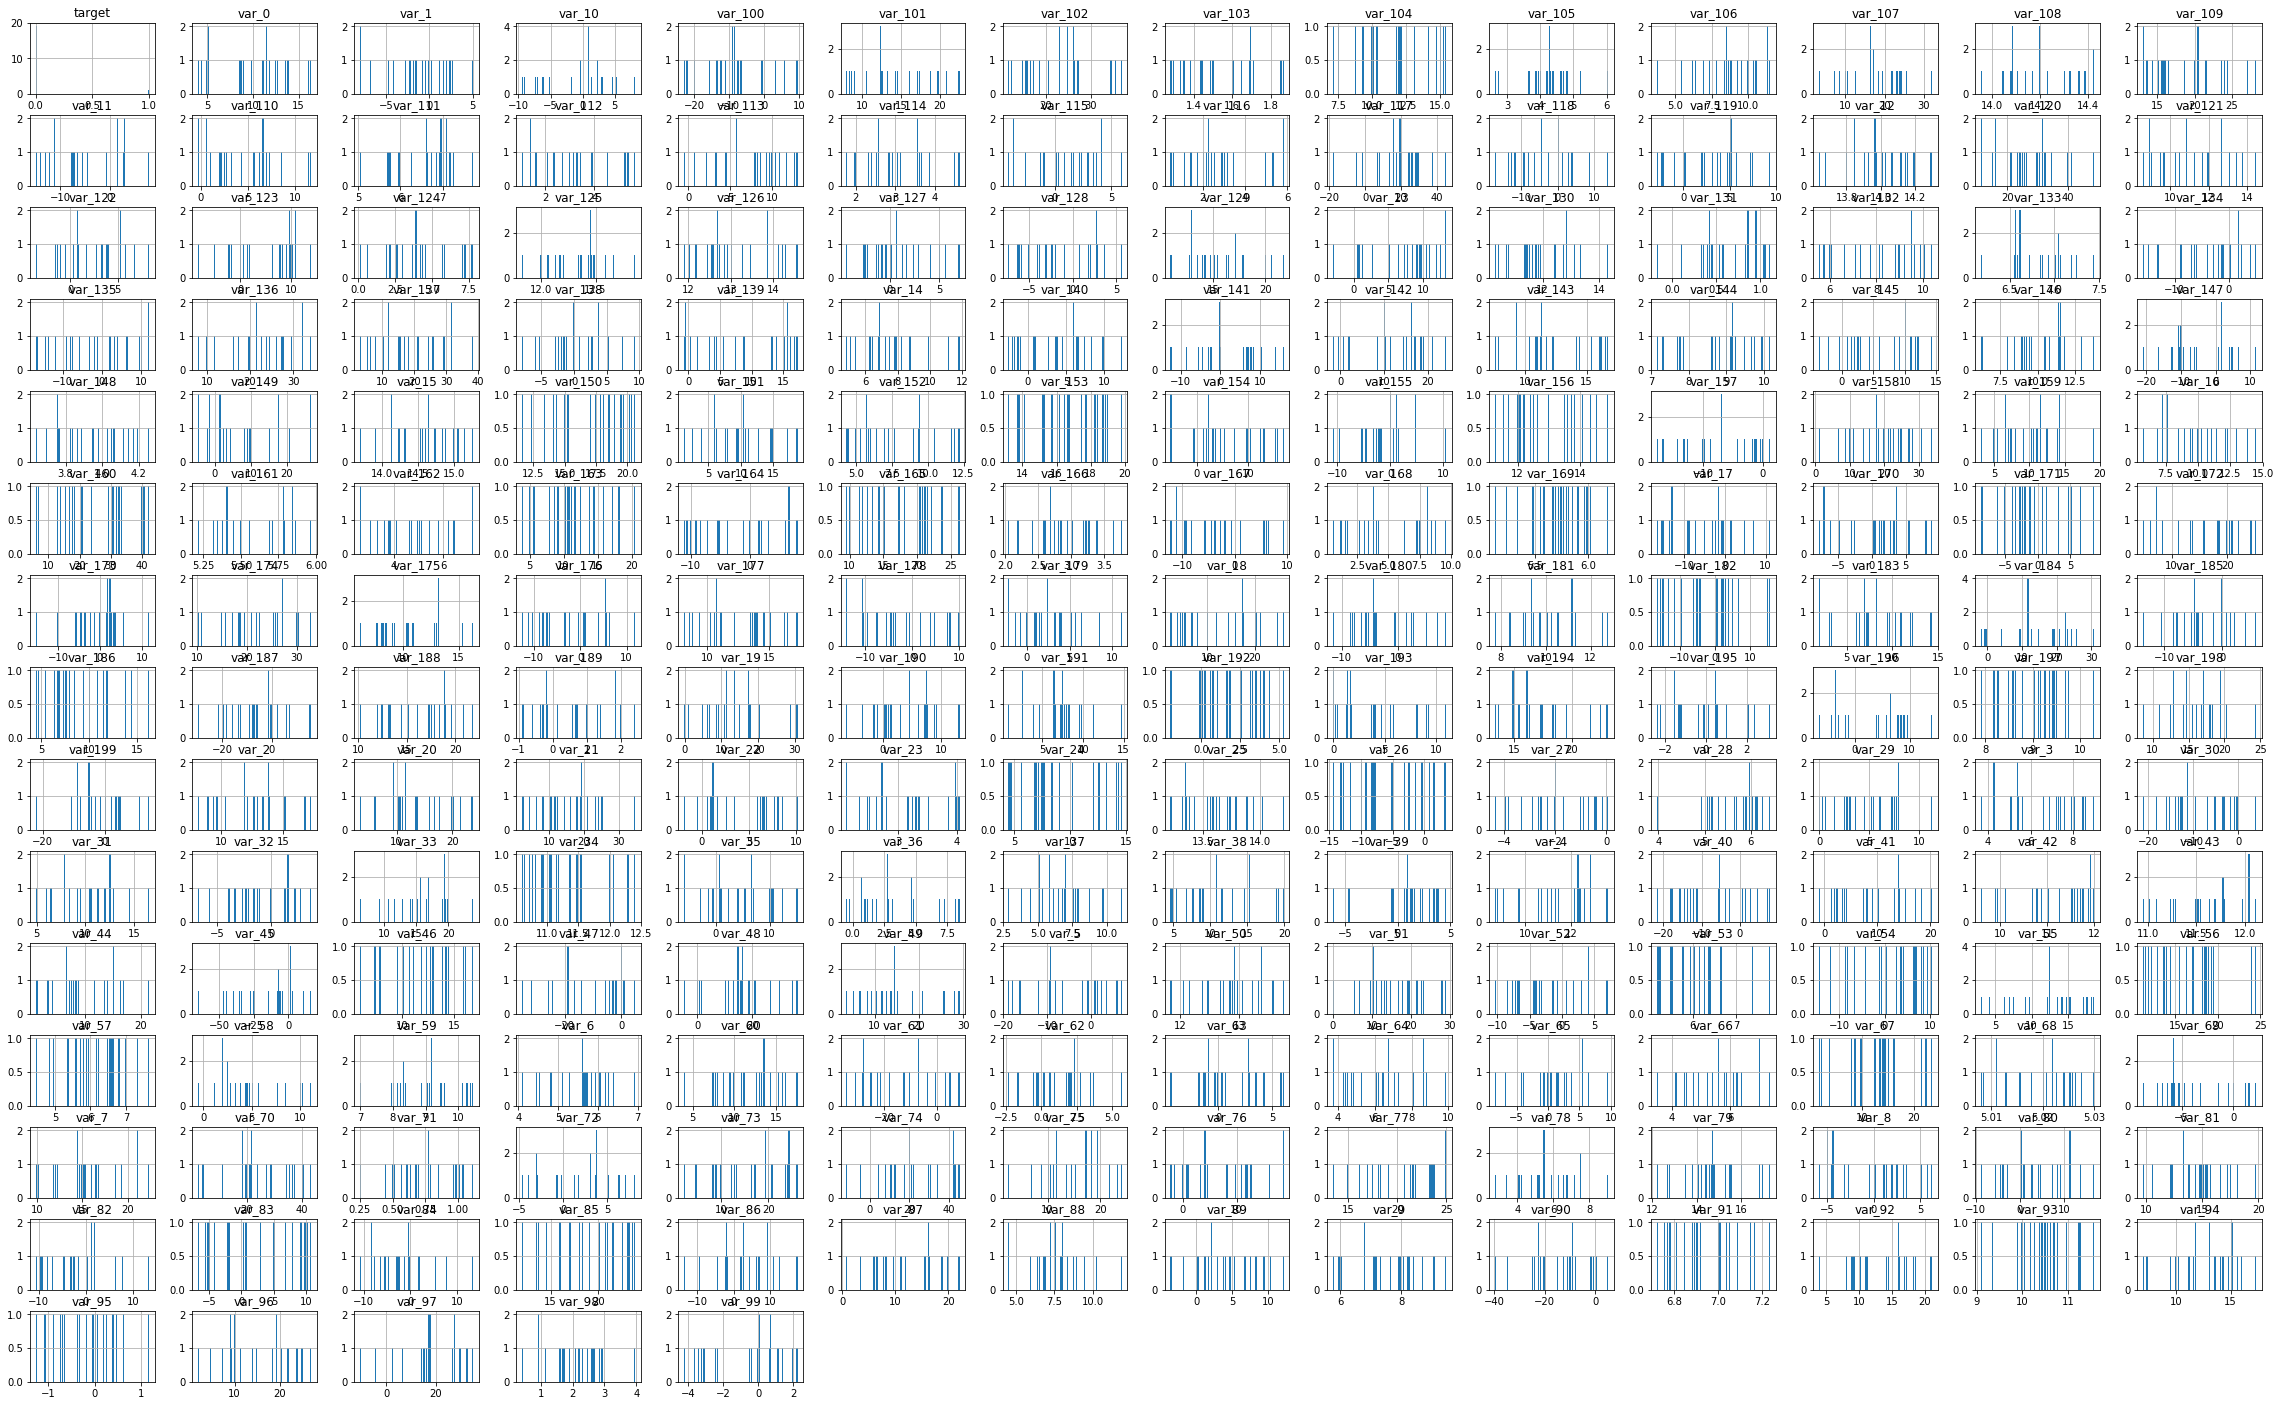

In [11]:
#To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

%matplotlib inline
import matplotlib.pyplot as plt
train[0:20].hist(bins=100, figsize=(40,25))
plt.savefig("attribute_histogram_plots")
plt.show()

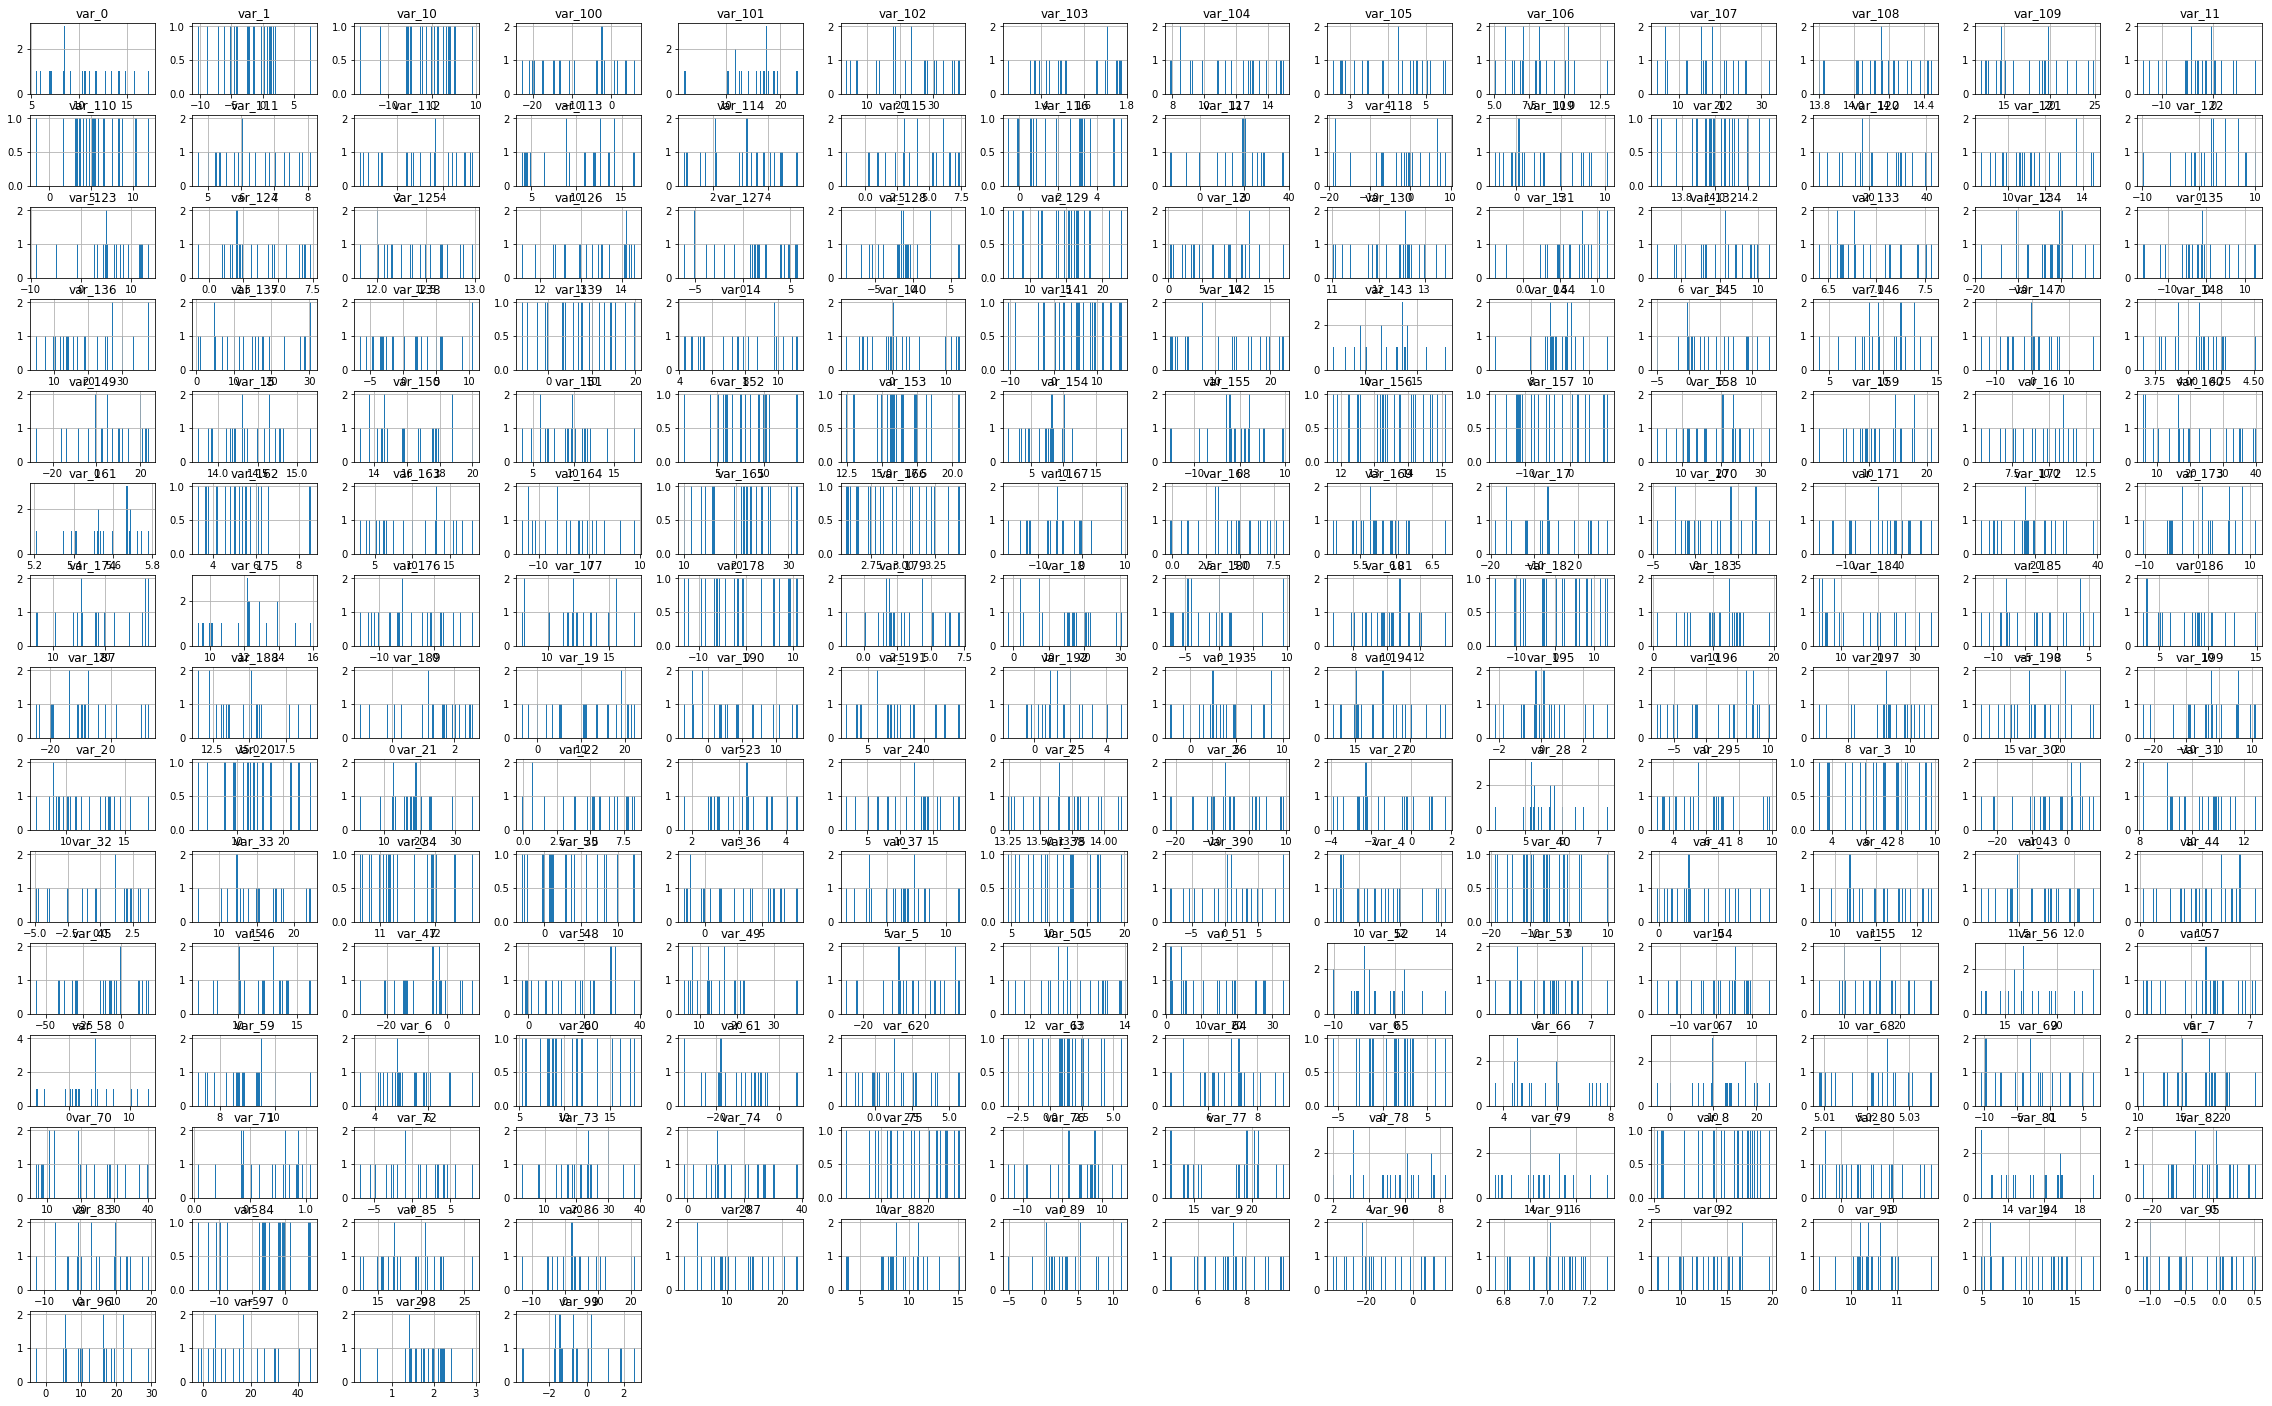

In [17]:
#To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

%matplotlib inline
import matplotlib.pyplot as plt
test[0:20].hist(bins=100, figsize=(40,25))
plt.savefig("attribute_histogram_plots")
plt.show()

C:\Users\GLADY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


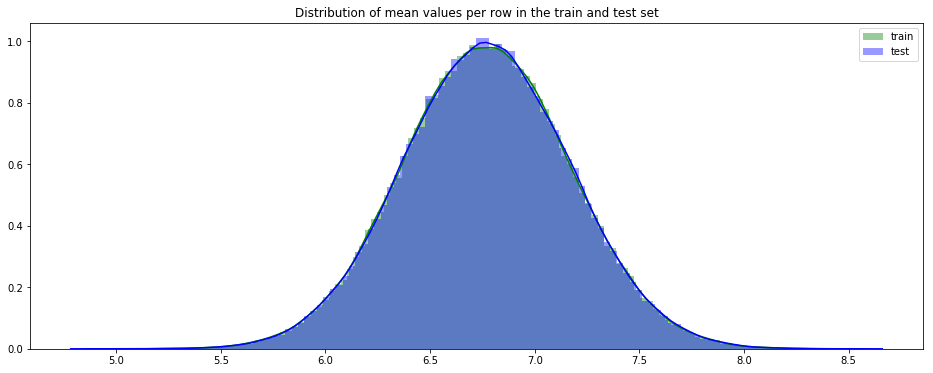

In [25]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [57]:
###################OUTLIER ANALYSIS###################


In [56]:
#converting datatype of target variable into category
train['target'] = train['target'].astype('category')

In [58]:
train.dtypes

ID_code      object
target     category
var_0       float64
var_1       float64
var_2       float64
var_3       float64
var_4       float64
var_5       float64
var_6       float64
var_7       float64
var_8       float64
var_9       float64
var_10      float64
var_11      float64
var_12      float64
var_13      float64
var_14      float64
var_15      float64
var_16      float64
var_17      float64
var_18      float64
var_19      float64
var_20      float64
var_21      float64
var_22      float64
var_23      float64
var_24      float64
var_25      float64
var_26      float64
var_27      float64
var_28      float64
var_29      float64
var_30      float64
var_31      float64
var_32      float64
var_33      float64
var_34      float64
var_35      float64
var_36      float64
var_37      float64
var_38      float64
var_39      float64
var_40      float64
var_41      float64
var_42      float64
var_43      float64
var_44      float64
var_45      float64
var_46      float64
var_47      float64


In [59]:
del train['ID_code']

In [63]:
train1=train

In [85]:
X = train.values[:, 1:201]
Y = train.values[:,0]

In [84]:
#train=train1

In [86]:
cnames = train.select_dtypes([np.number]).columns

In [87]:
print(cnames)

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)


In [77]:
# #Detect and delete outliers from data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    train = train.drop(train[train.loc[:,i] > max].index)
    train = train.drop(train[train.loc[:,i] > max].index)

var_0
1.9973250000000018
19.214725
var_1
-13.8883
10.5069
var_2
3.03125
18.20765
var_3
0.648387500000001
12.929687499999998
var_4
6.316162500000003
15.8280625
var_5
-29.38855
19.11505
var_6
2.914674999999999
7.856075000000001
var_7
6.204749999999999
26.84135
var_8
-10.200575
10.820825
var_9
3.6706749999999992
11.532475000000002
var_10
-15.5629
16.350700000000003
var_11
-20.055575
13.397825000000001
var_12
13.488700000000001
14.569499999999998
var_13
-5.728900000000002
23.075900000000004
var_14
0.5482624999999981
14.502562500000002
var_15
13.345000000000002
15.792199999999998
var_16
2.0470000000000015
16.461
var_17
-24.97705
13.69135
var_18
-8.572149999999999
38.76105
var_19
-11.9607
36.6665
var_20
-5.253099999999998
31.759299999999996
var_21
-5.758950000000006
40.400650000000006
var_22
-3.9835499999999993
12.459249999999999
var_23
1.4798500000000003
4.55785
var_24
-1.183250000000002
22.277350000000002
var_25
12.845450000000001
14.474649999999999
var_26
-20.6674
12.256599999999999
var_2

In [88]:
train.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0

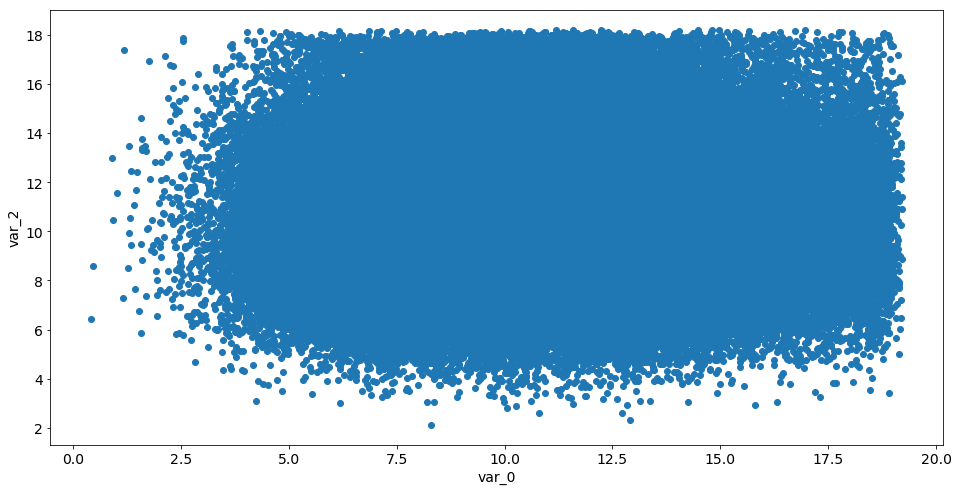

In [81]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['var_0'], train['var_2'])
ax.set_xlabel('var_0')
ax.set_ylabel('var_2')
plt.show()

In [48]:
#no outliers

In [30]:
##Correlation analysis
#Correlation plot
corr = train.loc[:,cnames]

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(corr)

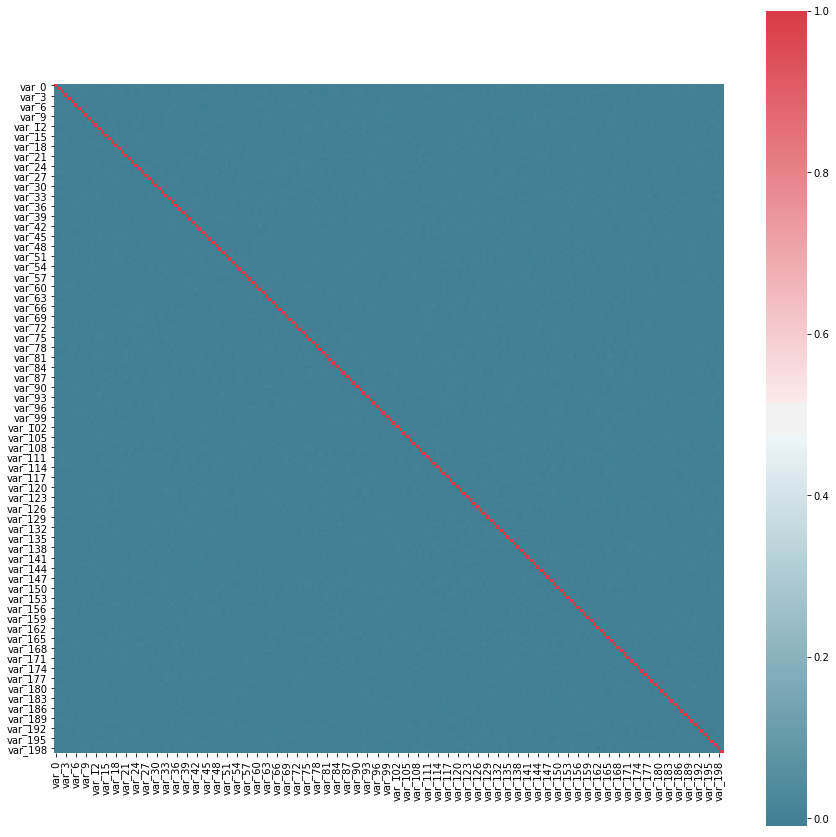

In [31]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(15, 15))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [35]:
#Feature Scaling

In [89]:
traincopy=train.copy()

In [106]:
traincopy.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
var_30     0
var_31     0
var_32     0
var_33     0
var_34     0
var_35     0
var_36     0
var_37     0
var_38     0
var_39     0
var_40     0
var_41     0
var_42     0
var_43     0
var_44     0
var_45     0
var_46     0
var_47     0
var_48     0
var_49     0
var_50     0
var_51     0
var_52     0
var_53     0
var_54     0
var_55     0
var_56     0
var_57     0
var_58     0
var_59     0
var_60     0
var_61     0
var_62     0
var_63     0
var_64     0
var_65     0
var_66     0
var_67     0
var_68     0
var_69     0
var_70     0
var_71     0
var_72     0
var_73     0
var_74     0
var_75     0

In [107]:
train=traincopy

(array([2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        6.000e+00, 5.000e+00, 1.000e+01, 7.000e+00, 1.000e+01, 1.600e+01,
        1.500e+01, 2.500e+01, 3.600e+01, 3.700e+01, 4.900e+01, 5.700e+01,
        5.200e+01, 8.000e+01, 1.080e+02, 1.400e+02, 1.640e+02, 1.990e+02,
        2.260e+02, 2.630e+02, 3.140e+02, 3.630e+02, 4.390e+02, 4.550e+02,
        5.460e+02, 6.020e+02, 6.910e+02, 8.250e+02, 8.720e+02, 1.026e+03,
        1.062e+03, 1.212e+03, 1.280e+03, 1.496e+03, 1.614e+03, 1.712e+03,
        1.834e+03, 2.010e+03, 2.145e+03, 2.195e+03, 2.445e+03, 2.437e+03,
        2.689e+03, 2.875e+03, 2.846e+03, 3.001e+03, 3.157e+03, 3.129e+03,
        3.330e+03, 3.327e+03, 3.389e+03, 3.379e+03, 3.473e+03, 3.570e+03,
        3.482e+03, 3.604e+03, 3.494e+03, 3.640e+03, 3.714e+03, 3.696e+03,
        3.524e+03, 3.625e+03, 3.545e+03, 3.488e+03, 3.532e+03, 3.475e+03,
        3.466e+03, 3.326e+03, 3.447e+03, 3.286e+03, 3.311e+03, 3.124e+03,
        3.195e+03, 3.073e+03, 3.016e+0

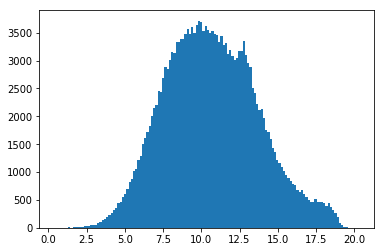

In [37]:
#Normality check
%matplotlib inline  
plt.hist(train['var_0'], bins='auto')

In [82]:
print(cnames)

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)


In [108]:
#for i in cnames:
#    print(i)
#    train[i] = (train[i] - min(train[i]))/(max(train[i]) - min(train[i]))

In [91]:
train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [94]:
#Divide data into train and test
#X = train.iloc[:, 1:201]
#Y = train.iloc[:,0]

#X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

In [109]:
#y_train.head()
#y_train.target.nunique()

In [110]:
train.dtypes

target     category
var_0       float64
var_1       float64
var_2       float64
var_3       float64
var_4       float64
var_5       float64
var_6       float64
var_7       float64
var_8       float64
var_9       float64
var_10      float64
var_11      float64
var_12      float64
var_13      float64
var_14      float64
var_15      float64
var_16      float64
var_17      float64
var_18      float64
var_19      float64
var_20      float64
var_21      float64
var_22      float64
var_23      float64
var_24      float64
var_25      float64
var_26      float64
var_27      float64
var_28      float64
var_29      float64
var_30      float64
var_31      float64
var_32      float64
var_33      float64
var_34      float64
var_35      float64
var_36      float64
var_37      float64
var_38      float64
var_39      float64
var_40      float64
var_41      float64
var_42      float64
var_43      float64
var_44      float64
var_45      float64
var_46      float64
var_47      float64
var_48      float64


In [ ]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
train['target'] = train['target'].replace(0,'No')
train['target'] = train['target'].replace(1,'Yes')

In [111]:
#Create logistic data. Save target variable first
train_logit = pd.DataFrame(train['target'])

In [112]:
#Add continous variables
train_logit = train_logit.join(train[cnames])

In [113]:
train_logit.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [114]:
Sample_Index = np.random.rand(len(train_logit)) < 0.7

train = train_logit[Sample_Index]
test = train_logit[~Sample_Index]

In [124]:
test.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Actual_prob,ActualVal
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,0.621545,1
7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,...,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806,0.064154,0
8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,...,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453,0.034262,0
10,0,5.0702,-0.5447,9.5900,4.2987,12.3910,-18.8687,6.0382,14.3797,-0.4711,...,0.2139,-0.0761,14.9585,-1.2160,6.6576,9.2553,14.2914,-7.6652,0.004403,0
24,0,5.9240,-3.7285,11.0995,4.6969,11.7363,-20.4102,5.8125,15.9027,-2.5871,...,0.7899,4.3212,17.2716,-0.9999,10.0978,10.2561,14.3032,2.0897,0.053902,0


In [115]:
#select column indexes for independent variables
train_cols = train.columns[1:201]

In [116]:
train_cols

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [117]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['target'], train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.230386
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               140018
Model:                          Logit   Df Residuals:                   139818
Method:                           MLE   Df Model:                          199
Date:                Wed, 07 Aug 2019   Pseudo R-squ.:                  0.2908
Time:                        02:37:49   Log-Likelihood:                -32258.
converged:                       True   LL-Null:                       -45483.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0607      0.003     18.069      0.000       0.054       0.067
var_1          0.0402      0.003     15.788      0.000       0.035       0.045
var_2          0.0660      0.004     17.150      0.000       0.059       0.074
var_3          0.0165      0.005      3.257      0.001       0.007       0.026
var_4          0.0193      0.006      3.021      0.003       0.007       0.032
var_5          0.0139      0.001     10.599      0.000       0.011       0.017
var_6          0.2589      0.012     21.866      0.000       0.236       0.282
var_7          0.0004      0.003      0.148      0.883      -0.006       0.006
var_8          0.0167      0.003      5.355      0.000       0.011       0.023
var_9         -0.1092      0.008    -13.122      0.000      -0.125      -0.093
var_10        -0.0015      0.002     -0.778      0.437      -0.005       0.002
var_11         0.0137      0.002      7.893      0.000       0.010       0.017
var_12        -1.1327      0.053    -21.218      0.000      -1.237      -1.028
var_13        -0.0372      0.002    -16.831      0.000      -0.042      -0.033
var_14        -0.0079      0.005     -1.700      0.089      -0.017       0.001
var_15         0.1405      0.025      5.579      0.000       0.091       0.190
var_16         0.0103      0.004      2.557      0.011       0.002       0.018
var_17        -0.0007      0.002     -0.482      0.629      -0.004       0.002
var_18         0.0162      0.001     12.369      0.000       0.014       0.019
var_19         0.0041      0.001      3.159      0.002       0.002       0.007
var_20        -0.0106      0.002     -6.031      0.000      -0.014      -0.007
var_21        -0.0237      0.001    -18.732      0.000      -0.026      -0.021
var_22         0.0718      0.004     20.042      0.000       0.065       0.079
var_23        -0.1713      0.020     -8.703      0.000      -0.210      -0.133
var_24         0.0248      0.003      9.069      0.000       0.019       0.030
var_25         0.1530      0.036      4.235      0.000       0.082       0.224
var_26         0.0321      0.002     18.652      0.000       0.029       0.035
var_27        -0.0098      0.007     -1.441      0.150      -0.023       0.004
var_28        -0.1031      0.013     -7.781      0.000      -0.129      -0.077
var_29         0.0103      0.004      2.604      0.009       0.003       0.018
var_30        -0.0009      0.001     -0.714      0.475      -0.003       0.002
var_31        -0.0388      0.005     -8.049      0.000      -0.048      -0.029
var_32         0.0408      0.004     10.198      0.000       0.033       0.049
var_33        -0.0350      0.002    -14.517      0.000      -0.040      -0.030
var_34        -0.3161      0.019    -16.521      0.000      -0.354      -0.279
var_35         0.0232      0.002     11.641      0.000       0.019       0.027
var_36        -0.0395      0.003    -11.922      0.000      -0.046      -0.033
var_37         0.0065      0.005      1.404      0.160      -0.003       0.015
va

In [118]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\GLADY\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [120]:
#Build confusion matrix
CM = pd.crosstab(test['target'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)



91.30905938448201

In [122]:
#RECALL
((TP)*100)/(TP+FN)

27.14332460732984

In [123]:
#PRECISION
((TP)*100)/(TP+FP)

68.58205870194296

In [128]:
X_traindf=train.iloc[:,1:201]
Y_traindf=train.iloc[:,0]
X_testdf=test.iloc[:,1:201]
Y_testdf=test.iloc[:,0]

In [131]:
Y_traindf.head()

0    0
2    0
3    0
4    0
5    0
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [132]:
#%%
from sklearn.linear_model import LogisticRegression
#create a model

classifier = LogisticRegression()
#fittingn training data to the model
classifier.fit(X_traindf,Y_traindf)

Y_preddf=classifier.predict(X_testdf)
print(list(zip(Y_testdf, Y_preddf)))

[(0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [135]:
#Fit logistic regression to the training set

classifier = LogisticRegression(random_state=0,penalty='l2',verbose=0)
classifier.fit(X_traindf, Y_traindf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
#Predicting the test set results and creating confusion matrix

Y_preddf = pipe_lr.predict(X_testdf)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_testdf, Y_preddf)
print(confusion_matrix)
#Y_pred

[[53261   609]
 [ 4588  1524]]


In [158]:
#Y_testdf.shape
Y_preddf.shape

(59982,)

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr = roc_curve(Y_traindf, Y_preddf)
roc_auc = auc(fpr, tpr)

ValueError: Found input variables with inconsistent numbers of samples: [140018, 59982]

In [140]:
#Accuracy
pipe_lr.score(X_testdf, Y_testdf)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_testdf, Y_testdf)))

0.913357340535494

In [141]:
#Compute precision, recall, F-measure and support
#To quote from Scikit Learn:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
#The support is the number of occurrences of each class in y_test.

from sklearn.metrics import classification_report
print(classification_report(Y_testdf, Y_preddf))

#Classifier visualization playground

             precision    recall  f1-score   support

          0       0.92      0.99      0.95     53870
          1       0.71      0.25      0.37      6112

avg / total       0.90      0.91      0.89     59982



In [173]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [174]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [175]:
auc = roc_auc_score(Y_testdf, Y_preddf)
print('AUC: %.2f' % auc)

AUC: 0.62


In [145]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 100).fit(X_traindf, Y_traindf)

In [146]:
RF_Predictions = RF_model.predict(X_testdf)

In [147]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(Y_testdf, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 88
#FNR: 67

89.81527791670834

In [148]:
from sklearn.metrics import classification_report
print(classification_report(Y_testdf, RF_Predictions))

#Classifier visualization playground

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     53870
          1       1.00      0.00      0.00      6112

avg / total       0.91      0.90      0.85     59982



In [164]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [165]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [171]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_traindf, Y_traindf)
probs = model.predict_proba(X_testdf)
auc = roc_auc_score(Y_testdf, RF_Predictions)
print('AUC: %.2f' % auc)

AUC: 0.50


In [ ]:
#XGB